<a href="https://colab.research.google.com/github/axe-n/tvm/blob/main/NON_Linear_Dynamics__3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSS -Sequence

In [ ]:

def logistic_map(r, x):
    return r * x * (1 - x)

def get_mss_symbolic_word(r, tol=1e-2, max_iter=1000):
    x = 0.5
    word = ''
    for i in range(max_iter):
        x = logistic_map(r, x)
        if i > 0 and abs(x - 0.5) < tol:
            break
        elif x < 0.5 - tol:
            word += 'L'
        elif x > 0.5 + tol:
            word += 'R'
    return word

r_values = [3.2361, 3.9375, 3.9603, 3.9976, 3.9057]
for r in r_values:
    word = get_mss_symbolic_word(r)
    print("For r =", r, "the sequence is:", word)


For r = 3.2361 the sequence is: R
For r = 3.9375 the sequence is: RLLRR
For r = 3.9603 the sequence is: RLL
For r = 3.9976 the sequence is: RLLLL
For r = 3.9057 the sequence is: RLLR


## lorenz system

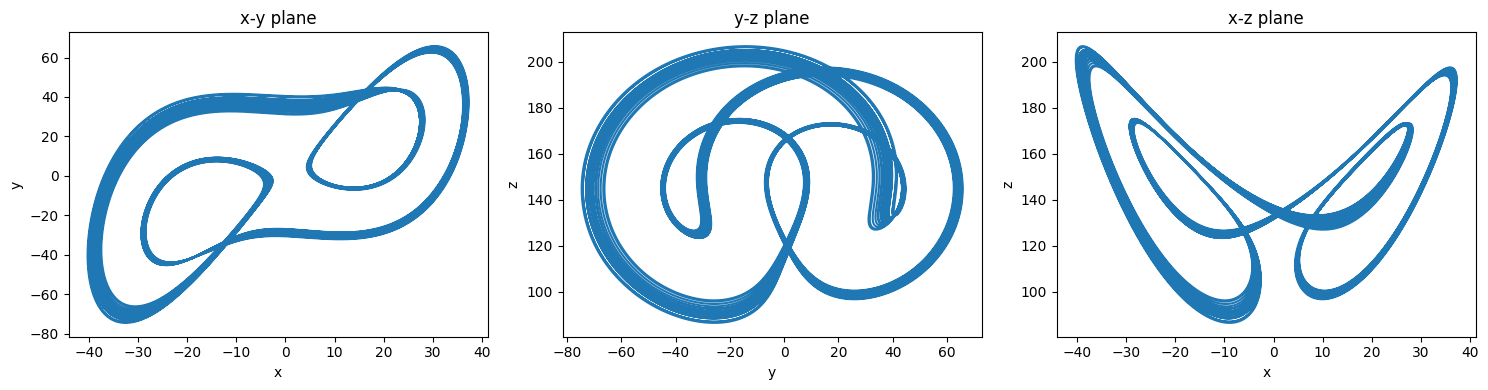

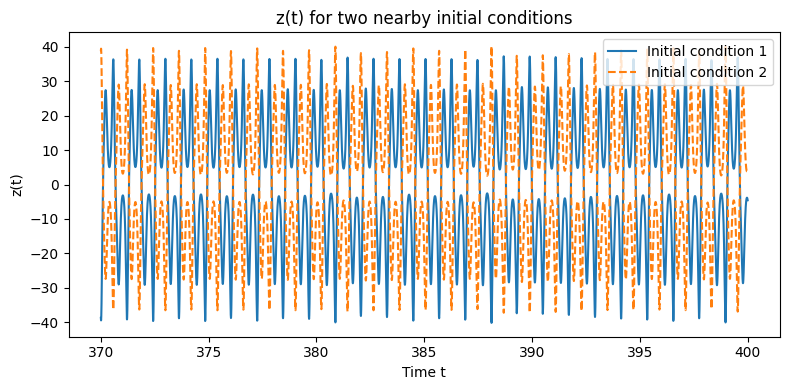

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

s, b, r = 10, 8/3, 147.0


def lorenz(t, state):
    x, y, z = state
    dx = -s * (x - y)
    dy = r*x - y -x* z
    dz = x * y - b * z
    return [dx, dy, dz]


t_span = (0, 400)
t_eval = np.linspace(370,400, 100000)


init1 = [7.85, 7.85, 23.1]
init2 = [-7.85, -7.85, 23.1]


sol1 = solve_ivp(lorenz, t_span, init1, t_eval=t_eval)
sol2 = solve_ivp(lorenz, t_span, init2, t_eval=t_eval)


fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(131)
ax1.plot(sol1.y[0], sol1.y[1])
ax1.set_title("x-y plane")
ax1.set_xlabel("x"); ax1.set_ylabel("y")

ax2 = fig.add_subplot(132)
ax2.plot(sol1.y[1], sol1.y[2])
ax2.set_title("y-z plane")
ax2.set_xlabel("y"); ax2.set_ylabel("z")

ax3 = fig.add_subplot(133)
ax3.plot(sol1.y[0], sol1.y[2])
ax3.set_title("x-z plane")
ax3.set_xlabel("x"); ax3.set_ylabel("z")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(sol1.t, sol1.y[0], label="Initial condition 1")
plt.plot(sol2.t, sol2.y[0], label="Initial condition 2", linestyle='--')
plt.title("z(t) for two nearby initial conditions")
plt.xlabel("Time t")
plt.ylabel("z(t)")
plt.legend()
plt.tight_layout()
plt.show()

#3D plot

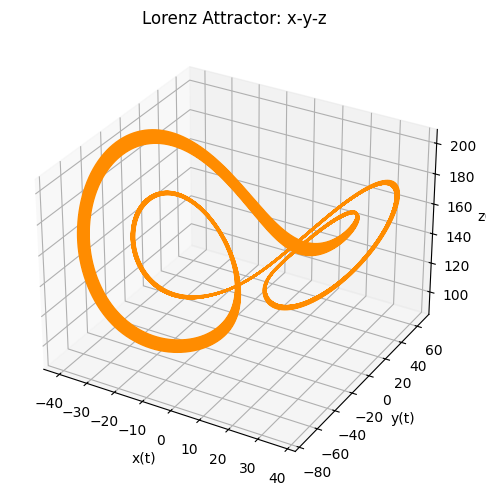

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol1.y[0], sol1.y[1], sol1.y[2], color='darkorange')
ax.set_title("Lorenz Attractor: x-y-z")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.tight_layout()
plt.show()

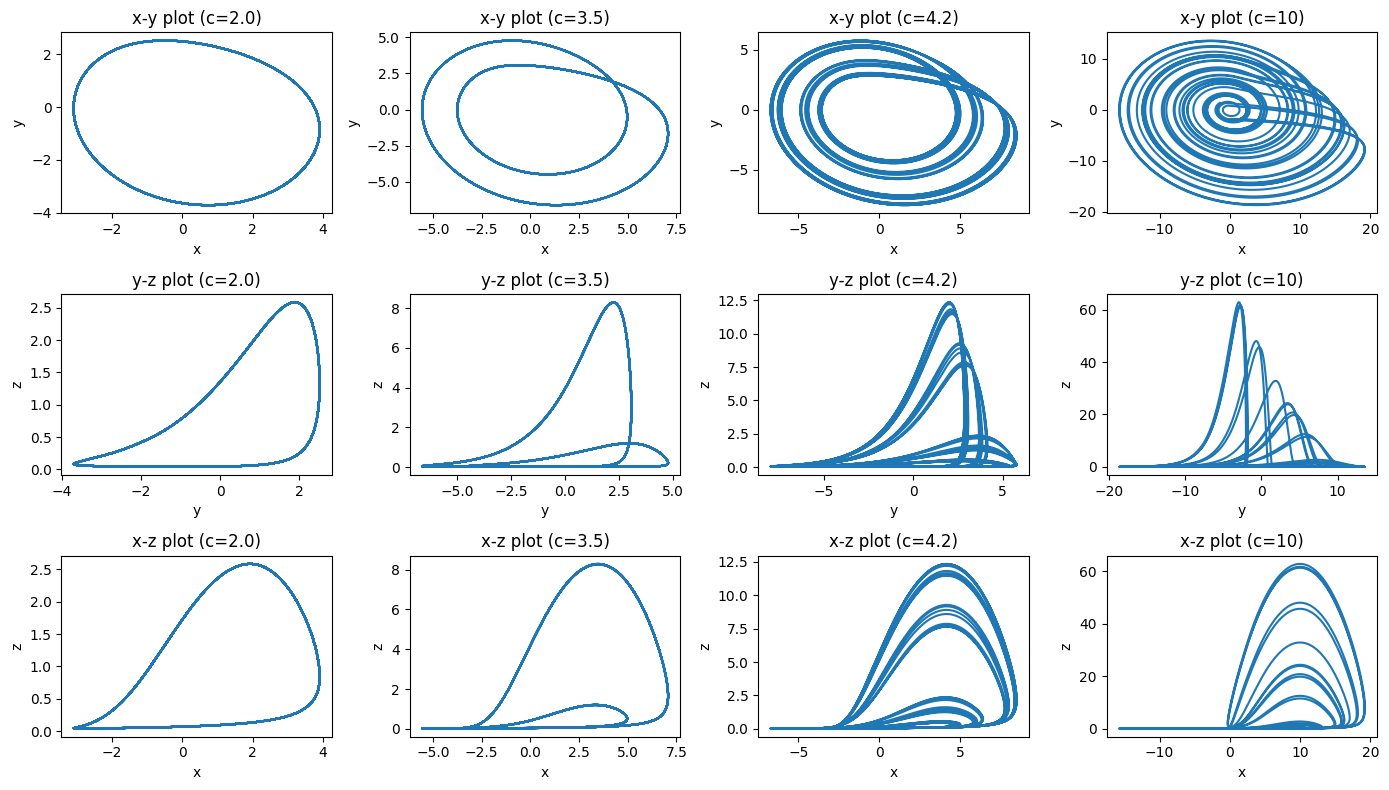

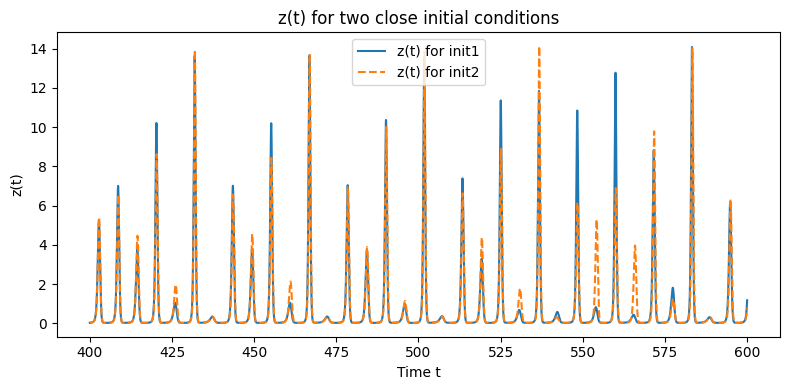

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def rossler(t, state, a, b, c):
    x, y, z = state
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return [dx, dy, dz]


t_span = (0, 600)
t_eval = np.linspace(400,600, 40000)
initial_state = [1, 1, 1]


a = 0.2
b = 0.2

cs = [2.0, 3.5,4.2,10]

fig, axes = plt.subplots(3, 4, figsize=(14, 8))

for i in range(4):
    c = cs[i]
    sol = solve_ivp(rossler, t_span, initial_state, args=(a, b, c), t_eval=t_eval)
    x, y, z = sol.y

    axes[0, i].plot(x, y)
    axes[0, i].set_title(f"x-y plot (c={c})")
    axes[0, i].set_xlabel("x")
    axes[0, i].set_ylabel("y")

    axes[1, i].plot(y, z)
    axes[1, i].set_title(f"y-z plot (c={c})")
    axes[1, i].set_xlabel("y")
    axes[1, i].set_ylabel("z")

    axes[2, i].plot(x, z)
    axes[2, i].set_title(f"x-z plot (c={c})")
    axes[2, i].set_xlabel("x")
    axes[2, i].set_ylabel("z")

plt.tight_layout()
plt.show()


a = 0.2
b = 0.2
c = 4.5

init1 = [1.0, 1.0, 1.0]
init2 = [1.0 + 1e-8, 1.0, 1.0]

sol1 = solve_ivp(rossler, t_span, init1, args=(a, b, c), t_eval=t_eval)
sol2 = solve_ivp(rossler, t_span, init2, args=(a, b, c), t_eval=t_eval)

plt.figure(figsize=(8, 4))
plt.plot(sol1.t, sol1.y[2], label="z(t) for init1")
plt.plot(sol2.t, sol2.y[2], '--', label="z(t) for init2")
plt.xlabel("Time t")
plt.ylabel("z(t)")
plt.title("z(t) for two close initial conditions")
plt.legend()
plt.tight_layout()
plt.show()


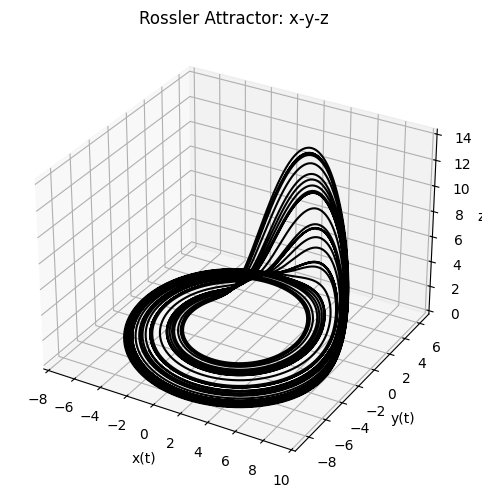

In [ ]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol1.y[0], sol1.y[1], sol1.y[2], color='Black')
ax.set_title("Rossler Attractor: x-y-z")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
plt.tight_layout()
plt.show()


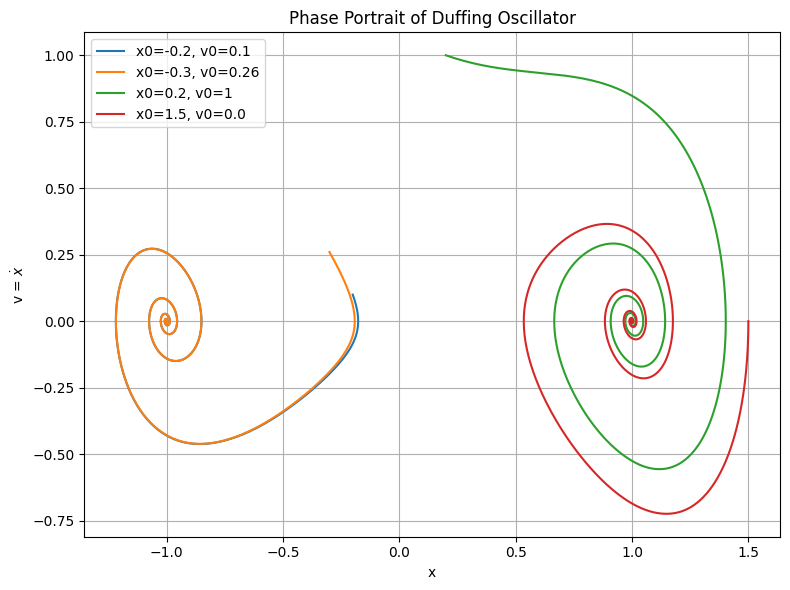

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def duffing(t, state, k, beta, alpha, f, omega):
    x, v = state
    dxdt = v
    dvdt = -k * v - alpha * x - beta * x**3 + f * np.cos(omega * t)
    return [dxdt, dvdt]


k = 0.5
f = 0.0
beta = 1
alpha = -1
omega = 1

t_span = (0, 200)
t_eval = np.linspace(0,200, 10000)


initial_conditions = [
    [-0.2, 0.1],
    [-0.3, 0.26],
    [0.2, 1],
    [1.5, 0.0],

]

plt.figure(figsize=(8, 6))
for x0, v0 in initial_conditions:
    sol = solve_ivp(duffing, t_span, [x0, v0], args=(k, beta, alpha, f, omega), t_eval=t_eval)
    x, v = sol.y
    plt.plot(x, v, label=f"x0={x0}, v0={v0}")

plt.title("Phase Portrait of Duffing Oscillator")
plt.xlabel("x")
plt.ylabel("v = $\dot{x}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


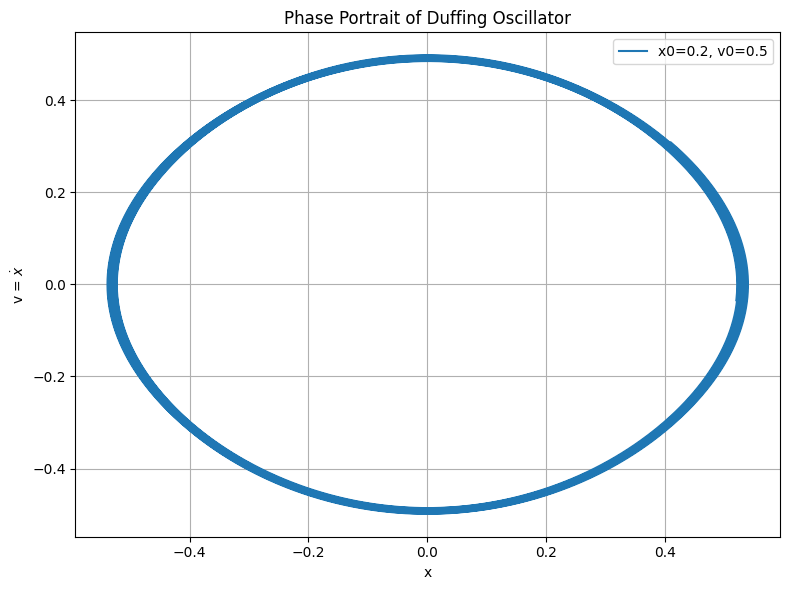

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def duffing(t, state, k, beta, alpha, f, omega):
    x, v = state
    dxdt = v
    dvdt = -k * v - alpha * x - beta * x**3 + f * np.cos(omega * t)
    return [dxdt, dvdt]


k = 0
f = 0
beta = -1
alpha = 1
omega = 0

t_span = (0, 600)
t_eval = np.linspace(340,440, 10000)


initial_conditions = [
    [0.2, 0.5]

]

plt.figure(figsize=(8, 6))
for x0, v0 in initial_conditions:
    sol = solve_ivp(duffing, t_span, [x0, v0], args=(k, beta, alpha, f, omega), t_eval=t_eval)
    x, v = sol.y
    plt.plot(x, v, label=f"x0={x0}, v0={v0}")

plt.title("Phase Portrait of Duffing Oscillator")
plt.xlabel("x")
plt.ylabel("v = $\dot{x}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()